## Automobile Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# adjusts style to emulate ggplot 
# a popular plotting package for R
plt.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## EDA

In [2]:
# load the Automobile Data dataset 
auto = pd.read_csv('auto.csv')
print(auto.head())

    mpg  displ   hp  weight  accel  origin  size
0  18.0  250.0   88    3139   14.5      US  15.0
1   9.0  304.0  193    4732   18.5      US  20.0
2  36.1   91.0   60    1800   16.4    Asia  10.0
3  18.5  250.0   98    3525   19.0      US  15.0
4  34.3   97.0   78    2188   15.8  Europe  10.0


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
origin    392 non-null object
size      392 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [4]:
auto['origin'].unique()

array(['US', 'Asia', 'Europe'], dtype=object)

mpg is the target feature. There are six predictors. Five are numeric. Origin is a categorical variable with three possible values: US, Asia, and Europe.

## Boxplot of Categorical Features

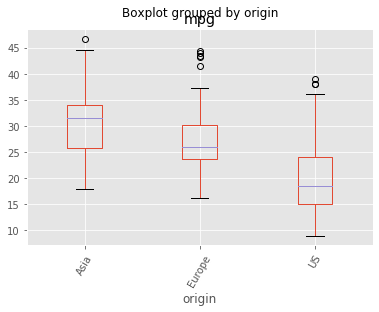

In [5]:
# Create a boxplot of mpg grouped by origin
auto.boxplot('mpg', 'origin', rot=60)

plt.show()

## Dealing with Categorical Features
By default, Scikit Learn will not accept categorical features. We need to encode categorical features numerically. To do this, we convert to dummy variables. A 0 means the observation was not in that category. A 1 means the observation was in that category. 

## Dummy Variables

To deal with categorical features in Python, we can use OneHotEncoder() in Sklearn or get_dummies() in Pandas.

### Encoding Dummy Variables

In [6]:
# use pandas get_dummies to encode the origins column numerically
auto_origin = pd.get_dummies(auto)
print(auto_origin.head())

    mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0  


We don't actually need all three: origin_Asia, origin_Europe, and origin_US. An automobile has a single origin so we can infer one column from the other two. 

In [7]:
# drop the origin_Asia column leaving two columns
# alternatively we could have passed the drop_first option
auto_origin = auto_origin.drop('origin_Asia', axis=1)
print(auto_origin.head())

    mpg  displ   hp  weight  accel  size  origin_Europe  origin_US
0  18.0  250.0   88    3139   14.5  15.0              0          1
1   9.0  304.0  193    4732   18.5  20.0              0          1
2  36.1   91.0   60    1800   16.4  10.0              0          0
3  18.5  250.0   98    3525   19.0  15.0              0          1
4  34.3   97.0   78    2188   15.8  10.0              1          0


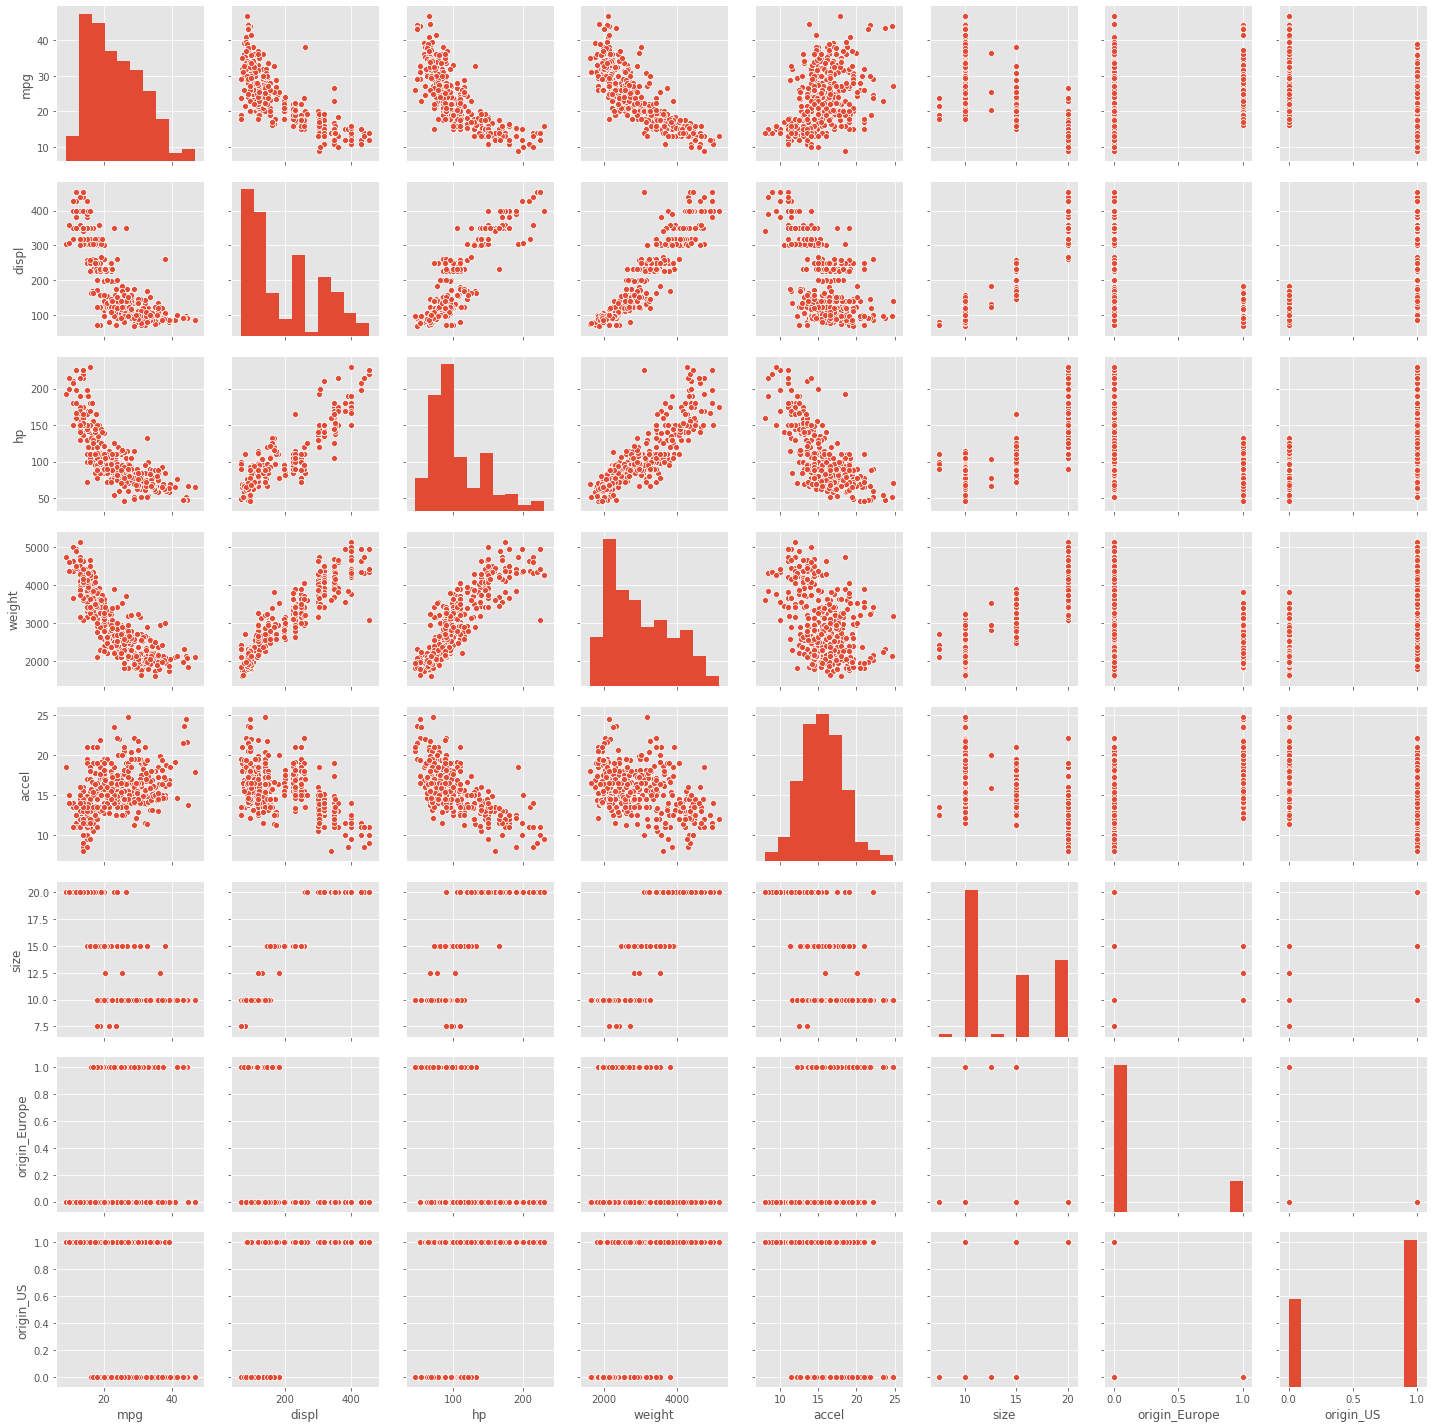

In [13]:
# create pairplots of all factors in the dataset 
sns.pairplot(auto_origin)

In [9]:
X = auto_origin.drop('mpg', axis=1).values
y = auto_origin['mpg'].values

## Linear Regression with dummy variables

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

In [14]:
ridge.score(X_test, y_test)

0.7190645190217895